# Сборный проект

**Цель исследования**

Нужно выявить определяющие успешность игры закономерности, для определения потенциально популярного продукта.
Оценить аудиторию в разных регионах. И проверить 2 гипотезы: 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
1. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**Ход исследования**

Данные из файла `/datasets/games.csv` содержат исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Перед исследованием необходимо просомтреть данные, выявить и исправить ошибки и пропуски. Оценить влияние пропусков на ход исследования.

Работа пройдёт в шесть этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ
 4. Составление портрета пользователя
 5. Проверка гипотез
 1. Общий вывод

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/Users/evgeniu/Desktop/Education/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


1. Name — название игры
1. Platform — платформа
1. Year_of_Release — год выпуска
1. Genre — жанр игры
1. NA_sales — продажи в Северной Америке (миллионы проданных копий)
1. EU_sales — продажи в Европе (миллионы проданных копий)
1. JP_sales — продажи в Японии (миллионы проданных копий)
1. Other_sales — продажи в других странах (миллионы проданных копий)
1. Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Предобработка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Столбцы** имееют корректные названия, но есть буквы верхнего регистра. Заменим на нижние.

In [5]:
data.columns = data.columns.str.lower()

### Пропуски

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В датасете есть 2 записи без названий, 2 без жанра и 269 без даты релиза. Этих данных небольшое количество(<2%). Можно их удалить.

In [7]:
data = data.dropna(subset=['year_of_release', 'name', 'genre']).reset_index(drop=True)

В записях остался рейтинг и оценки с nan. изучим их природу.
Количество записей с пропусками сопоставимо друг с другом.

In [8]:
data[(data['critic_score'].isna()) & (data['rating'].isna()) & (data['user_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Оценки для 6500 игр пропали без вести. Даже для марио :( 
Вердикт: ошибка выгрузки, может в датасете несколько источников, один из которых не хранит инфу об рейтингах.
Заполнение пропусков простыми методами может привести к сильному смещению в данных и ошибках в анализе. 

Еще в датасете в user_score есть загадочный tbd. Изучим:

In [9]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Первый раз вижу такие игры, это похоже что-то со дна геймдева. Сравним сумму средних по регионам общих продаж для игр с tbd и остальными.

In [10]:
print('Сумма средних продаж по регионам \nс tbd:', data[data['user_score'] == 'tbd'].iloc[:, 4:-3].mean().sum(),
    '\nбез tbd:', data[data['user_score'] != 'tbd'].iloc[:, 4:-3].mean().sum())

Сумма средних продаж по регионам 
с tbd: 0.18789983164983165 
без tbd: 0.5948194483935172


в 3 раза меньше. В гугле TBD (to be determined) значит подлежит уточнению. Это похоже на правду: Данные о пользовательских оценках могли быть загружены с источника с открытым голосованием об оценке игры. И что бы избежать смещения рейтинга из-за маленького объема голосов оценка остается закрытой, требующей уточнения. На всякий случай я сохраню отдельным столбцом is_tbd это значение, может оно потом понадобится. А в рейтинге это значение заменю на NaN

In [11]:
data['is_tbd'] = data['user_score'] == 'tbd'
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN

### Типы данных
* Year_of_Release - можно привести к int, но лучше в datetime
* User_Score - содержит десятичные числа и загадочный tbd. Нужно разобраться со строковым значением и привести столбец к float64

In [12]:


try: 
    data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y')
    data['user_score'] = data['user_score'].astype('float')
except ValueError as e:
    print('Ошибка преобразования', e)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           9768 non-null   object        
 11  is_tbd           16444 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


### Дубликаты

In [14]:
data.duplicated().sum()

0

In [15]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Здесь все хорошо, явных дубликатов нет, жанры и платформы не дублируются.

In [17]:
data[(data['name']+data['platform']).duplicated(keep=False) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_tbd
600,Madden NFL 13,PS3,2012-01-01,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,False
1177,Need for Speed: Most Wanted,X360,2012-01-01,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,False
1574,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,False
5883,Need for Speed: Most Wanted,PC,2005-01-01,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,False
11534,Need for Speed: Most Wanted,PC,2012-01-01,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,False
15969,Madden NFL 13,PS3,2012-01-01,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,False


Есть маленькие несостыковки: К культовому NFS MW пристала жалкая пародия 2012 года. Имя ей Most Wanted 2.
А вот Madden NFL 13 похоже имеет повтор. На нем 10000 продаж. Удалю, данным не повредит

In [18]:
data.loc[(data['name'] == 'Need for Speed: Most Wanted') & (data['year_of_release'] == '2012'), 'name'] = 'Need for Speed: Most Wanted 2'
try:
    data = data.drop(15969)
except:
    print('Значения не найдено')
data = data.reset_index(drop=True)

In [19]:
data['rating'].value_counts()

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

В рейтинге имееются группы с малыми значениями а так-же К-А - kids-to-adults, нынче имеет категорию E 

In [20]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

### Total_sales

In [21]:
data['total_sales'] = data.iloc[:, 4:8].apply('sum', axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_tbd,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,False,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,False,31.38


## Исследовательский анализ данных

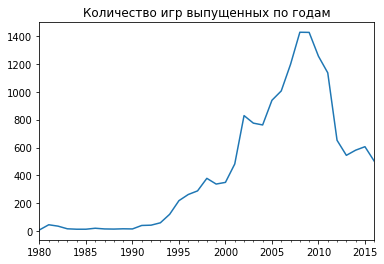

In [22]:
data.groupby('year_of_release')['name'].count().plot(
    title = 'Количество игр выпущенных по годам',
    xlabel=''
);

На графике виден пик выпущенных игр в 2008 году, потом индустрия пошла на спад. 

In [23]:

top_platform = list(data.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)[:20].index) #Собираем популярные платформы
by_platform_year = data.query('(platform in @top_platform) and (year_of_release > 1994)') #Отбрасываем непопулярные платформы и ранние продажи

In [24]:
by_platform_year = by_platform_year.groupby(['year_of_release','platform'])['total_sales'].sum()

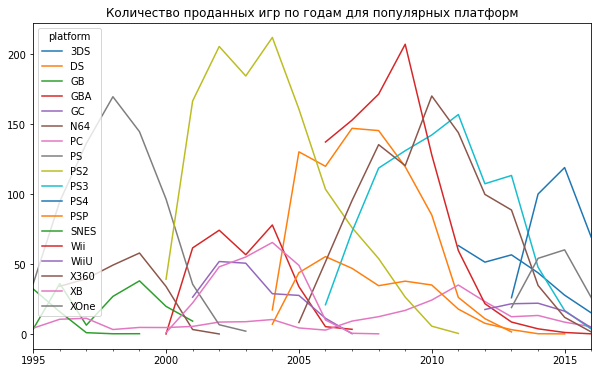

In [25]:
by_platform_year.unstack().plot(
    figsize=(10,6),
    xlabel='',
    title='Количество проданных игр по годам для популярных платформ'
);

Срок жизни платформы 5-10 лет. На графике видны границы смены поколений (примерно 2000, 2006, 2013) консолей. С 2013 на рынке оказались XOne и PS4. Их можно принять за консоли нового поколения, и считать их амбоссадорами. Все ранние консоли не покажут продаж в 2017. Для 2016 года виден подозрительный спад продаж. Возможно данные содержат не полное количество продаж за 2016 год.

### Актуальный период

Для прогноза на 2017 было-бы разумно полагаться на тенденции последних 3-х лет. Но так-же стоит обратить внимание на показатели продаж предыдущего поколения: какие платформы были более популярны, появились ли новые поколения этих платформ.
Посмотрим на такой-же график в разрезе последних 3-х лет:

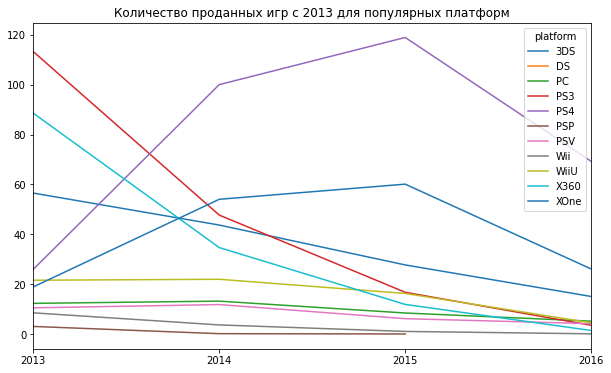

In [26]:
actual_frame = data.query('(year_of_release >= 2013)')
actual_frame\
    .groupby(['year_of_release','platform'])['total_sales'].sum()\
    .unstack().plot(
    figsize=(10,6),
    xlabel='',
    title='Количество проданных игр c 2013 для популярных платформ'
);

### Фавориты актуального периода

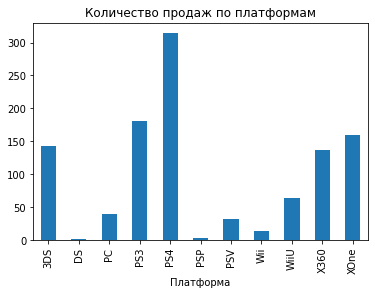

In [27]:
actual_frame\
.groupby(by='platform')['total_sales'].sum()\
.reset_index().plot\
    .bar(x='platform',
         xlabel='Платформа',
         legend=None,
         title='Количество продаж по платформам');

Всего в актуальном периоде имеется 10 платформ, 5 из них занимают основной рынок. 

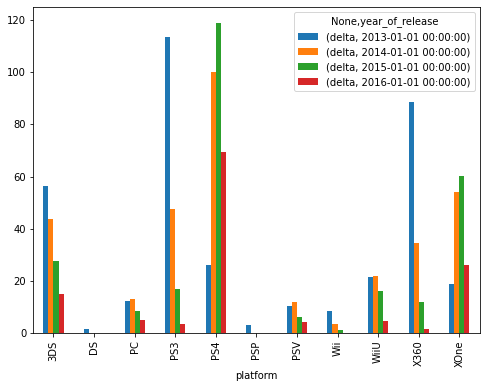

In [28]:
actual_frame.groupby(['platform', 'year_of_release']).agg(delta=('total_sales', 'sum')).unstack().plot.bar(figsize=(8,6));

Среди растущих платформ есть только PS4 и XOne. В 2016 данные как-будто только за полгода.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Хороший аналитический анализ. Да мы имеем неполные данные за 2016 год. 


### Ящик с усами

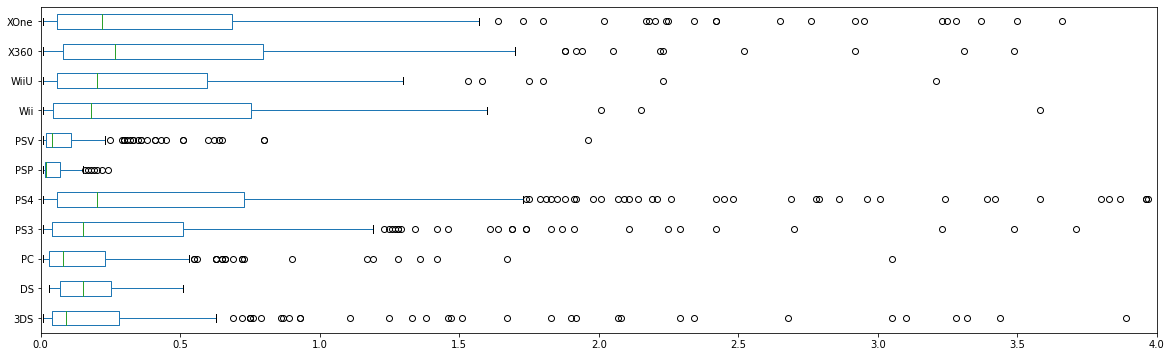

In [29]:
actual_frame.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').plot(kind='box', vert=False, figsize=(20,6), xlim=(0,4), xlabel='Количество продаж (млн)');

Sony vs Microsoft: У настольных платформ Сони есть много выбросов но при этом медиана остается левее платформ Микрософт. Сони, видимо, имеет больше эксклюзивных игр, которые выбиваются из максимума, на платформе XBox объем покупок между играми распределен более равномерно.

Нинтендо 3DS так-же показывает много выбросов. Платформа, похоже, держится именно на таких играх.

### Влияние отзывов на продажи 

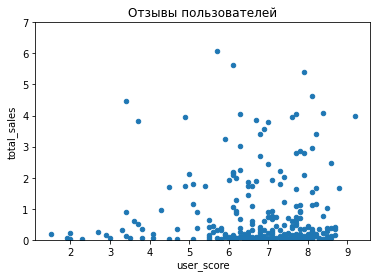

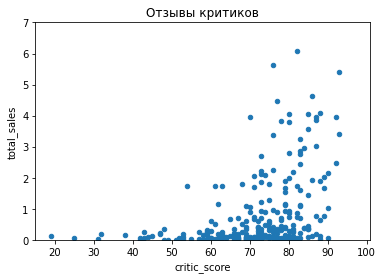

In [30]:
actual_frame[actual_frame['platform'] == 'PS4'].plot(kind='scatter', x='user_score', y='total_sales', title='Отзывы пользователей', ylim=(0,7));
plt.show()
actual_frame[actual_frame['platform'] == 'PS4'].plot(kind='scatter', x='critic_score', y='total_sales', title='Отзывы критиков',ylim=(0,7));

In [31]:
actual_frame[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.502221,0.313700
user_score,0.502221,1.000000,-0.002608
total_sales,0.313700,-0.002608,1.000000


Графики распределения показывают что критики более точны в своих оценках: Ни одна игра не разошлась миллионным тиражем с низким рейтингом. Но не всякая игра с высоким рейтином набирает хотя-бы один миллион покупок.
Среди пользователелей в целом распределение более свободное. Это значит что пользователи свободны и эмоциональны в оценках. Но и авторитет у них невысок. Корреляции в оценках пользователей нет. А среди оценок критиков корреляция 30%. При этом мнения критиков и пользователей сходятся примерно в половине случаев :)

In [32]:
for platform in actual_frame['platform'].value_counts().index[:5]:
    print ('Корреляция по платформе ', platform)
    print(actual_frame[actual_frame['platform'] == platform][['critic_score', 'user_score', 'total_sales']].corr(), '\n')

Корреляция по платформе  PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000 

Корреляция по платформе  PSV
              critic_score  user_score  total_sales
critic_score      1.000000    0.611521     0.254742
user_score        0.611521    1.000000     0.000942
total_sales       0.254742    0.000942     1.000000 

Корреляция по платформе  PS3
              critic_score  user_score  total_sales
critic_score      1.000000    0.599920     0.334285
user_score        0.599920    1.000000     0.002394
total_sales       0.334285    0.002394     1.000000 

Корреляция по платформе  3DS
              critic_score  user_score  total_sales
critic_score      1.000000    0.769536     0.357057
user_score        0.769536    1.000000     0.241504
total_sales       0.357057    0.241504     1.000000 

Корреляция по платформе  XOne
              

### Распределение игр по жанрам



Посмотрите на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? 
Выделяются ли жанры с высокими и низкими продажами?

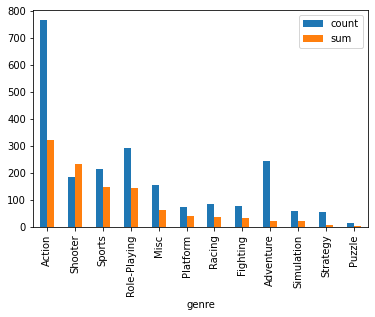

In [33]:

actual_frame.pivot_table(index='genre', values='total_sales', aggfunc=('count', 'sum')).sort_values(by='sum', ascending=False).plot.bar();

Экшн, шутер, спорт - самые активные, с быстрым геймплеем игры. Продаются они больше всего. Замыкают рейтинг медленные, медитативные игры. Продаются мало, денег не много. 

* Среди жанра приключения очень много игр с малым количеством покупок.
* Среди шутеров невероятный ажиотаж: на количество игр пропорциональное число покупок большое. Наверное там правит серия Call of Duty

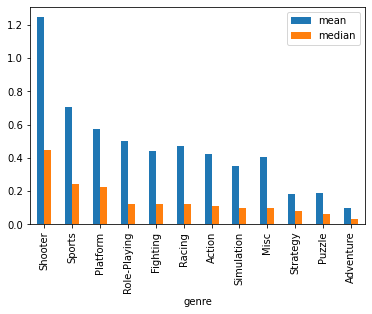

In [34]:

actual_frame.pivot_table(index='genre', values='total_sales', aggfunc=('mean', 'median')).sort_values(by='median', ascending=False).plot.bar();

## Портрет пользователя по региону

In [35]:
platform_by_region = actual_frame.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
genre_by_region = actual_frame.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
rating_by_region = actual_frame.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

### Платформы

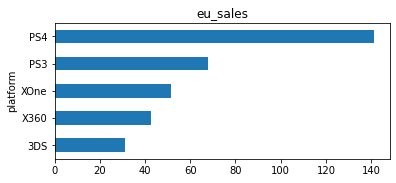

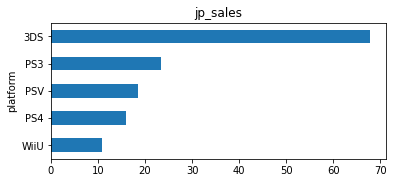

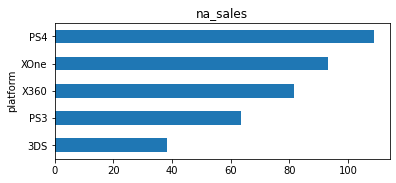

In [36]:
for column in platform_by_region.columns:
    platform_by_region.sort_values(by = column).tail(5).plot.barh(y = column, figsize=(6,2.5), ylabel = '', legend = None, title = column)

* Европа: пользователи европы используют платформы как Японских, так и Американских брендов.
* Япония. На японском рынке игр преобладают платформы брендов своего региона. Видно, что основная доля консолиий - портативный сегмент. Настольные консоли не так сильно проникли в массы. 
* В Америке сильнее преобладают консоли от Микрософт, чем в других регионах.

Консоли нового поколения получили распостранение в Европе и Америке. Свой иксбокс американцы приняли теплее чем европейцы.

### Жанры

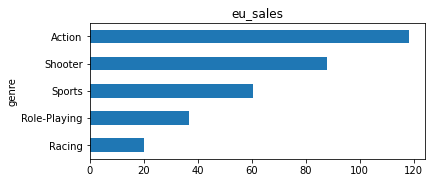

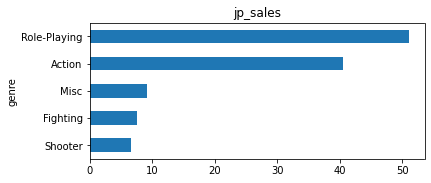

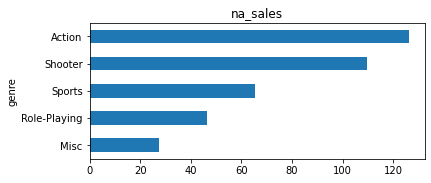

In [37]:
for column in genre_by_region.columns:
    genre_by_region.sort_values(by = column).tail(5).plot.barh(y = column, figsize=(6,2.5), ylabel = '', legend = None, title = column)

У Американцев и Европейцев почти полностью сходятся предпочтения по жанрам: экшн, шутер, спортивные - самые продаваемые. В Японии препочтение отдают ролевым играм и экшену. Японская культура оказывает сильное влияние на игровые предпочтения.

### Рейтинг

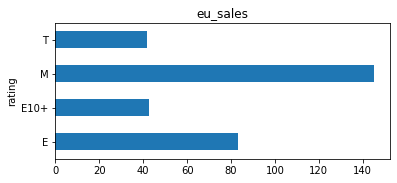

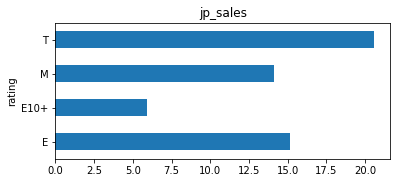

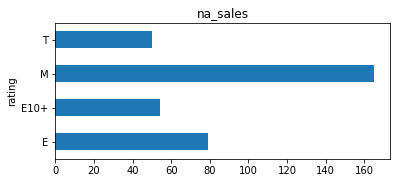

In [38]:
rating_by_region
for column in rating_by_region.columns:
    rating_by_region.plot.barh(y = column, figsize=(6,2.5), ylabel = '', legend = None, title = column)

Тут так-же прослеживается общая картина у Американцев и Европейцев. Любовь к шутерам возводит рейтинг М (17+) сильно вверх.
В Японии основной игрок - тинейджер

## Гипотезы

### Гипотеза 1
Нулевая гипотеза звучит так: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Обратная: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

Для проверки гипотезы будут представлены две совокупности, проверка будет осуществлена с помощью независимого двухвыборочного t-теста

In [39]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    actual_frame.loc[actual_frame['platform'] ==  'PC','user_score'].dropna(), 
    actual_frame.loc[actual_frame['platform'] ==  'XOne', 'user_score'].dropna(),
    equal_var = True)
# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Если сравнивать набор данных актуального переода, когда как раз вышел XBox One, то гипотеза не отвергается. Выборку считаю корректной т.к. платформа ПК существует много лет, за которые компетентность пользователей могла изменится

### Гипотеза 2

Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковы.

Н1: Средние пользовательские рейтинги жанров Action и Sports не одинаковы.

Для проверки гипотезы будут представлены две совокупности, проверка будет осуществлена с помощью независимого двухвыборочного t-теста

In [40]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    actual_frame.loc[actual_frame['genre'] ==  'Action','user_score'].dropna(), 
    actual_frame.loc[actual_frame['genre'] ==  'Sports', 'user_score'].dropna(),
    equal_var = True)
# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

1.0517832389140023e-27
Отвергаем нулевую гипотезу


## Заключение

В результате выполнения проекта можно сделать следущие выводы:

* в 2013-2015 году наблюдался спад количества новых игр. 
* за историю выпуска игр видно 3 прошедших поколения платформ, и сейчас наблюдается рождение 4-го
* Срок жизни платформы 5-10 лет
* Sony - лидер по продаваемым играм. Вместе с Мicrosoft они делят основной рынок
* Сони, имеет большое количество эксклюзивных игр, и дают аномально-большие продажи. На платформе XBox объем покупок между играми распределен более равномерно.
* Оценки критиков справедливы. Пользователи более свободно судят об играх.
* На шутеры и спортивные игры можно делать ставку: в этих жанрах немного игр, и они имеют хорошие продажи. 
* Региональный гейминг отличается, особенно в Японии: Там продается много игр для подростков. Играют там в РПГ и Экшен. Любят портативные консоли. Японские производители владеют рынком. Американский и Европейский сегмент схож, только в первом иксбоксов больше.

* Гипотеза о том что пользователи PC и XBox One в среднем судят одинаково имеет место быть. 
* Гипотеза о том средние пользовательские рейтинги жанров Action и Sports одинаковы так-же не опровергнута.

Ожидается хороший рост продаж игр на платформах PS4 и XOne. Игры в жанре экшн спорт и шутер наиболее вероятно будут иметь высокие продажи. Для японского рынка стоит присмотреться к рекламным кампаниям на рпг игры и игры для портативных платформ. 

Замечания:
16 год имеет примерно половину данных об продажах, что снижает точность оценки продаж на 2017 год. Для повышения точности прогнозов рекомендуется иметь информацию о выходе игр хотя бы по кварталам. 
выгрузка не полные данные об оценках и возрастном рейтинге.